In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
cd = pd.read_csv("D://assignments//assignment 4//delivery_time.csv")

print(cd.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [3]:
cd.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


<AxesSubplot:>

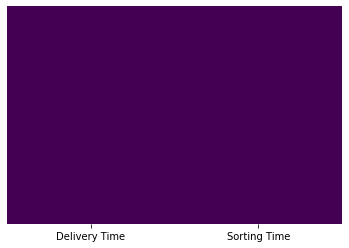

In [4]:
sns.heatmap(cd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
type(cd)
cd.shape

(21, 2)

In [6]:
cd.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
cd

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
cd = cd.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [10]:
cd.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

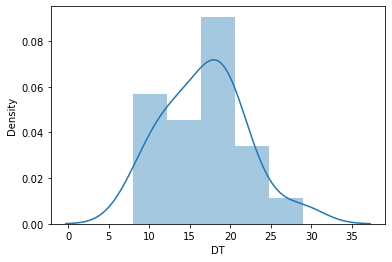

In [11]:
sns.distplot(cd['DT'])

C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

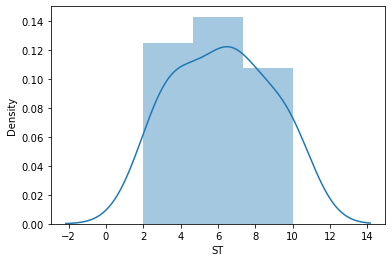

In [12]:
sns.distplot(cd['ST'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b90a7f5580>,
 'caps': [<matplotlib.lines.Line2D at 0x1b90a7f5c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b90a7f5280>],
 'medians': [<matplotlib.lines.Line2D at 0x1b90a7ff340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b90a7ff6a0>],
 'means': []}

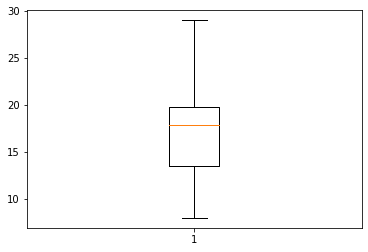

In [13]:
plt.boxplot(cd.DT)


{'whiskers': [<matplotlib.lines.Line2D at 0x1b90a84e670>,
 'caps': [<matplotlib.lines.Line2D at 0x1b90a84ed30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b90a84e310>],
 'medians': [<matplotlib.lines.Line2D at 0x1b90a85b460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b90a85b7c0>],
 'means': []}

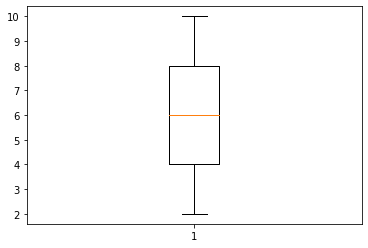

In [14]:
plt.boxplot(cd.ST)


(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

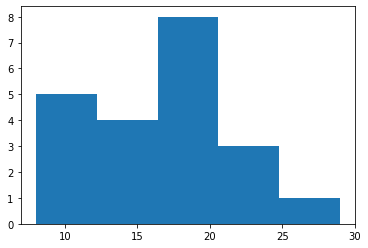

In [15]:
plt.hist(cd.DT, bins=5)


In [16]:
cd[cd.duplicated()].shape


(0, 2)

In [17]:
model = smf.ols("DT~ST",data = cd).fit()

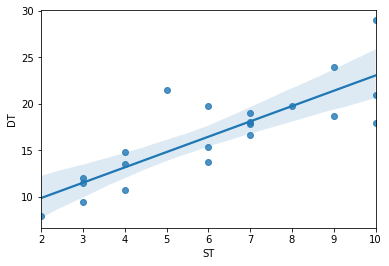

In [18]:
sns.regplot(x="ST", y="DT", data=cd);


In [19]:
model.params


Intercept    6.582734
ST           1.649020
dtype: float64

In [20]:
print(model.tvalues, '\n', model.pvalues)    


Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [21]:
(model.rsquared,model.rsquared_adj)


(0.6822714748417231, 0.6655489208860244)

In [22]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        21:02:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
cd1=cd

In [45]:

model2=smf.ols("np.log(DT)~np.log(ST)",data = cd1).fit()

In [46]:
(model2.rsquared,model2.rsquared_adj)


(0.77216134926874, 0.7601698413355158)

In [47]:
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           1.60e-07
Time:                        21:11:04   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
pred = model.predict(cd)

Text(0, 0.5, 'Delivery time')

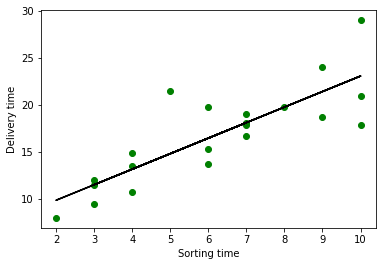

In [41]:
plt.scatter(x=cd.ST, y=cd.DT, color='green')
plt.plot(cd.ST, pred,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [49]:
pred2 = model2.predict(cd1)

In [59]:
pred2

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64